# Logistic Regression

## <span>1. Introduction</span>

Similarly to the linear regression case, let's assume that we have a set of pairs $({\bf x}_{i}, t_{i})$, where ${\bf x}_{i} \in \mathbb{R}^{d}$ is a $d$-dimensional attribute vector and $t_{i}$ is the target variable. The difference is that now $t_{i}$ can take only two different values, $t_{i} \in \{0, 1\}$. As before, we want to predict the value of $t_{i}$ from ${\bf x}_{i}$. Now we use the following model:

$$y_{i} = \sigma({\bf w}^{t} {\bf x}_{i} + b).$$

This is basically a linear model $z = {\bf w}^{t} {\bf x} + b$ followed by application of the **sigmoid** or **logistic** function:

$$\sigma(z) = \frac{e^{z}}{e^{z}+1} = \frac{1}{1+e^{-z}}.$$

The logistic function maps its input to the range $[-1, 1]$:

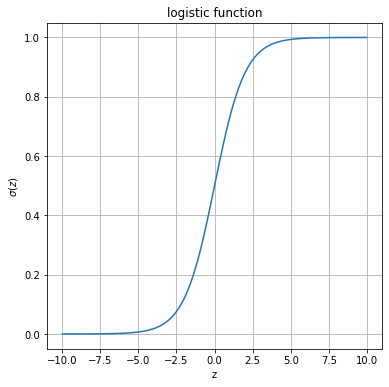

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-10, 10, 0.01)
y = 1.0 / (1.0 + np.exp(-z))

plt.figure(figsize=(6, 6))
plt.plot(z, y)
plt.grid(True)
plt.xlabel("z")
plt.ylabel("$\sigma(z)$")
plt.title("logistic function")
plt.show()

We usually interpret the model output $y_{i} = \sigma({\bf w}^{t} {\bf x}_{i} + b)$ as the probability of the target being $1$ given the attribute vector:

$$
y_{i} = P(t = 1 | {\bf x}_{i}).
$$

And hence:

$$
1 - y_{i} = P(t = 0 | {\bf x}_{i}).
$$


So our objective is now to find a set of parameters $\theta = \{{\bf w}, b\}$ that maximizes the likelihood of the targets $t_{i}$ given the attributes ${\bf x}_{i}$.

## <span>2. Cross-entropy loss</span>

The likelihood is given by:

$$l = \prod_{i} P(t = t_{i} | {\bf x}_{i}).$$

Taking logarithms we obtain the log-likelihood $L$:

$$L = \sum_{i} P(t = t_{i} | {\bf x}_{i}).$$

And substituting the model estimation of $P(t_{i} | {\bf x}_{i})$ we get:

$$L = \sum_{i} [t_{i} \log y_{i} + (1-t_{i}) \log (1-y_{i})],$$

where the trick is to realize that only one of the two terms in the sum above is not zero. In order to obtain a loss function that we minimize, we simply add a minus sign to define the **cross-entropy** loss as:

$$C = -\sum_{i} [t_{i} \log y_{i} + (1-t_{i}) \log (1-y_{i})].$$

We solve the logistic regression model by finding the parameters $({\bf w}, b)$ that minimize the cross-entropy loss. Contrary to linear regression, logistic regression does not have an analytic solution and must be solved numerically, using for example **gradient descent**.

## <span>3. Logistic regression in 1D</span>

As we did for linear regression, we will first consider a simple example in 1D, where $x_{i}$ is a  scalar. In this case the model is simply:

$$y_{i} = \sigma (w x_{i} + b).$$

The following code creates a set of 1000 data points $(x_{i}, t_{i})$ with $x_{i} \in [0, 10]$. Given $x_{i}$, we randomly determine the value of $t_{i}$ assuming that $P(t_{i} = 1 | {\bf x}_{i}) = \sigma(2x_{i} - 10)$. 

In [ ]:
# Parameters:
a = 2.0
b = -10.0
xmin = 0.0
xmax = 10.0
n = 1000

# Randomly generated problem data:
x = xmin + np.random.rand(n)*(xmax - xmin)
z = a*x + b
t = 1.0/(1.0 + np.exp(-z)) > np.random.rand(n)

The following code shows how the data are distributed in the plane $(x, t)$, together with the true probability $P(t = 1 | x) = \sigma(2x - 10)$. 

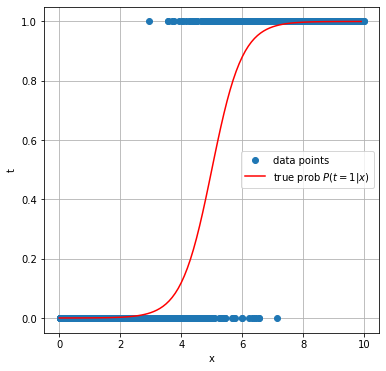

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(x, t, 'o', label='data points')
xrange = np.arange(xmin, xmax, 0.1)
realt = 1.0/(1.0 + np.exp(-a*xrange - b))
plt.plot(xrange, realt, 'r-', label='true prob $P(t = 1 | x)$')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

## <span>4. Gradient descent</span>

In order to minimize the cross-entropy loss using gradient descent, we need to compute the gradient of the loss function with respect to the model parameters. The partial derivatives of $C$ with respect to $w$ and $b$ can be shown to be: 

$$\frac{\partial C}{\partial w} = \sum_{i}(y_{i} - t_{i})x_{i},$$


$$\frac{\partial C}{\partial b} = \sum_{i}(y_{i} - t_{i}),$$

where we have made use of the fact that $\sigma'(z) = \sigma(z) (1 - \sigma(z))$. Note that the above expressions are exactly the same as those obtained for the linear regression case, and so the update rules for $w$ and $b$ are again:

$$w_{t+1} = w_{t} - \eta \sum_{i}(y_{i} - t_{i})x_{i},$$

$$b_{t+1} = b_{t} - \eta  \sum_{i}(y_{i} - t_{i}).$$

Let us apply this model to our problem data. The first thing is to initialize the model parameters $(w, b)$ to random values:

In [ ]:
w = np.random.randn()
b = np.random.randn()

We don't expect that this initial random guess provides any good estimation of the class probabilities, as demonstrated by the following piece of code:

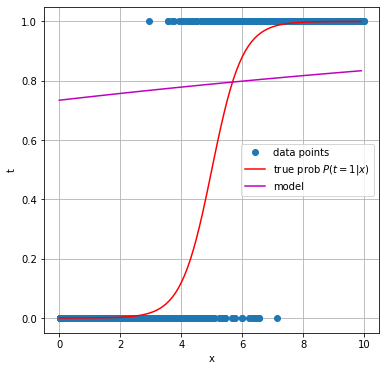

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(x, t, 'o', label='data points')
plt.plot(xrange, realt, 'r-', label='true prob $P(t = 1 | x)$')
modely = 1.0/(1.0 + np.exp(-w*xrange - b))
plt.plot(xrange, modely, 'm-', label='model')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

We need to perform several gradient descent steps until the algorithm converges to a good solution:

In [ ]:
num_iters = 1000 # number of iterations
eta = 0.0002     # learning rate
for i in range(num_iters):
    z = w*x + b
    y = 1.0/(1.0 + np.exp(-z))
    y_minus_t = y - t
    dw = np.sum(y_minus_t*x)
    db = np.sum(y_minus_t)
    w -= eta*dw 
    b -= eta*db 

If we plot the new solution we observe a much better approximation of the true probability by the model:

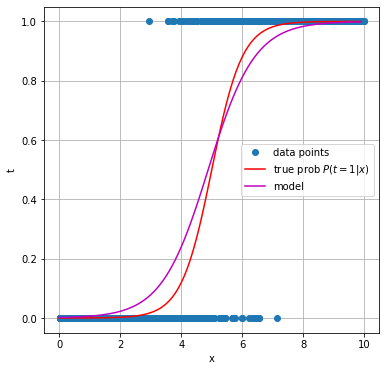

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(x, t, 'o', label='data points')
plt.plot(xrange, realt, 'r-', label='true prob $P(t = 1 | x)$')
modely = 1.0/(1.0 + np.exp(-w*xrange - b))
plt.plot(xrange, modely, 'm-', label='model')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

It is interesting to see how the model converges to the optimal solution. The following code shows this evolution, starting from a new random guess of the parameters:

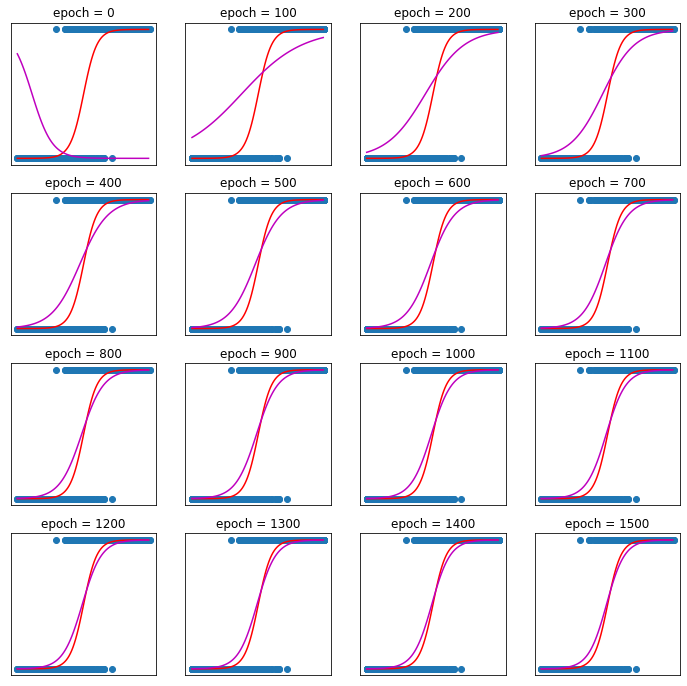

In [ ]:
w = np.random.randn()
b = np.random.randn()

num_iters = 1600
eta = 0.0002

plt.figure(figsize=(12,12))

k = 1
for i in range(num_iters):
    z = w*x + b
    y = 1.0/(1.0 + np.exp(-z))
    
    if i%100 == 0:
        plt.subplot(4, 4, k)
        plt.plot(x, t, 'o')
        plt.plot(xrange, realt, 'r-')
        modely = 1.0/(1.0 + np.exp(-w*xrange - b))
        plt.plot(xrange, modely, 'm-')
        plt.xticks([])
        plt.yticks([])
        plt.title("epoch = %d" % i)
        k += 1
    
    y_minus_t = y - t
    dw = np.sum(y_minus_t*x)
    db = np.sum(y_minus_t)
    w -= eta*dw
    b -= eta*db

plt.show()

Finally, we can observe this evolution in the $(w, b)$ plane:

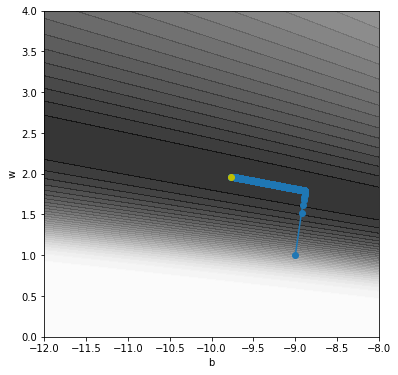

In [ ]:
w = 1.0
b = -9.0

whistory = [w]
bhistory = [b]

num_iters = 5000
eta = 0.0002

for i in range(num_iters):
    z = w*x + b
    y = 1.0/(1.0 + np.exp(-z))
    
    y_minus_t = y - t
    dw = np.sum(y_minus_t*x)
    db = np.sum(y_minus_t)
    w -= eta*dw
    b -= eta*db

    whistory.append(w)
    bhistory.append(b)
    
wvalues = np.arange(0., 4.01, 0.01)
bvalues = np.arange(-12., -7.99, 0.01)
bgrid, wgrid = np.meshgrid(bvalues, wvalues)

z = wgrid[:, :, None]*x[None, None, :] + bgrid[:, :, None]
y = 1.0 / (1.0 + np.exp(-z))
egrid = np.sum((y-t[None, None, :])**2, axis=2)

plt.figure(figsize=(6, 6))
plt.contourf(bgrid, wgrid, egrid, 40, cmap='gray', alpha=0.8)
plt.plot(bhistory, whistory, '-o')
plt.plot(bhistory[-1], whistory[-1], 'yo')
plt.xlabel('b')
plt.ylabel('w')
plt.show()

### Questions

- What happens if we increase the learning rate?
- What happens if we decrease the learning rate?


## <span>5. Logistic regression in arbitrary dimension</span>

In a more general situation we have a set of data $({\bf x}_{i}, t_{i})$ with ${\bf x}_{i} \in \mathbb{R}^{d}$. The model is:

$$y_{i} = \sigma({\bf w}^{t} {\bf x}_{i} + b),$$

where ${\bf w}$ is also a $d$-dimensional vector. Now the gradients are given by the following expressions:

$$\nabla_{{\bf w}} C = \sum_{i}(y_{i} - t_{i}){\bf x}_{i},$$


$$\frac{\partial C}{\partial b} = \sum_{i}(y_{i} - t_{i}).$$


### Exercise

- Extend the previous example to the multidimensional case.